Causal Inference

In [2]:
!pip install dowhy shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from dowhy import CausalModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

In [4]:
!pip install econml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from dowhy import CausalModel
from sklearn.linear_model import LogisticRegression
from econml.dml import CausalForestDML
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv(r"/content/sidd.csv")  #

df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1", "NCT Number", "Study Title"]) 



In [11]:
df

,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,Phases,Enrollment,...,reason_personal_reasons,reason_ongoing,reason_serious_adverse_event,reason_withdrawal_of_consent,reason_progressive_disease,reason_other_than_specified,reason_abnormal_laboratory_value(s),reason_missing,reason_unclassified,duration
0,COMPLETED,The hypothesis of this study is use of CytoSor...,NO,Acute Respiratory Distress Syndrome|Acute Lung...,DEVICE: CytoSorb Hemoperfusion,Relative IL-6 levels as a percent (%) of basel...,"Ventilator Free Days, Reduction cytokines TNF-...",ALL,UNKNOWN_PHASE,4.615121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.784190
1,NON COMPLETED,The primary purpose of this study is to find o...,NO,Cancer|Solid Tumors|Advanced Solid Malignancies,DRUG: AZD7762|DRUG: gemcitabine,Assessment of adverse events (based on CTCAE v...,Pharmacokinetic effect of AZD7762 when adminis...,ALL,PHASE1,3.218876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.995732
2,COMPLETED,To study the impact of 3 day exposure to atorv...,NO,Ischemia Reperfusion Injury|Cardiovascular Dis...,DRUG: atorvastatin,Annexin A 5 targeting in the non dominant then...,"workload during ischemic exercise, workload du...",MALE,PHASE4,3.433987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.258097
3,COMPLETED,The purpose of this study is to identify the f...,NO,Adolescent Idiopathic Scoliosis,"RADIATION: Flexibility Radiographs (supine, su...",Investigate the flexibility equivalence of dif...,Incorporate these findings into the Lenke Clas...,ALL,UNKNOWN_PHASE,4.905275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.583519
4,COMPLETED,"The proposed protocol is a double-blind, place...",YES,Cocaine Dependence,DRUG: Adderall-XR and Topiramate|DRUG: Placebo,Three Weeks of Continuous Cocaine Abstinence a...,UNKNOWN_MEASURES,ALL,PHASE2,4.406719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.688879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257571,COMPLETED,Bleeding after redo cardiac surgery is a commo...,NO,Hemorrhage,PROCEDURE: Spray Fibrin Sealant|PROCEDURE: Tra...,Bleeding (Amount of blood (ml) collected in ch...,Allogeneic blood Sparing (Amount of Allogeneic...,ALL,UNKNOWN_PHASE,4.795791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.995732
257572,COMPLETED,Acute kidney injury (AKI) is a common complica...,NO,Acute Kidney Injury,OTHER: Blood draw for measurement of MIF,"Macrophage migration inhibitory factor, Up to ...","Serum creatinine, Up to 14 days",ALL,UNKNOWN_PHASE,5.872118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465908
257573,COMPLETED,The investigators will develop an artificial i...,NO,Chest X-ray for Clinical Evaluation,DIAGNOSTIC_TEST: Scanning Chest X-rays and per...,"Left Ventricular Ejection Fraction < 40%, Eval...",UNKNOWN_MEASURES,ALL,UNKNOWN_PHASE,5.872118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
257574,COMPLETED,The purpose of this study is to assess the eff...,NO,Epidermolysis Bullosa,DRUG: Trimethoprim|DRUG: Trimethoprim,Percentage change of area of the wound from vi...,"Total number of blisters at each visit, At 2 m...",ALL,PHASE2,2.397895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.564949


In [12]:
df["Study Status"] = df["Study Status"].apply(lambda x: 1 if x == "Completed" else 0)


Normalizing numerical columns


In [13]:
numerical_cols = ["subjects_affected", "subjects_at_risk", "minimum_age", "maximum_age"]
categorical_cols = [col for col in df.columns if col not in numerical_cols + ["Study Status"]]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [14]:
#Treatment variable:
treatment = "subjects_affected"  

#Confounders: 
confounders = ["Enrollment", "Funder Type", "country_United States", "Sponsor Type"]

#Target variable
outcome = "Study Status"

DAG

1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.


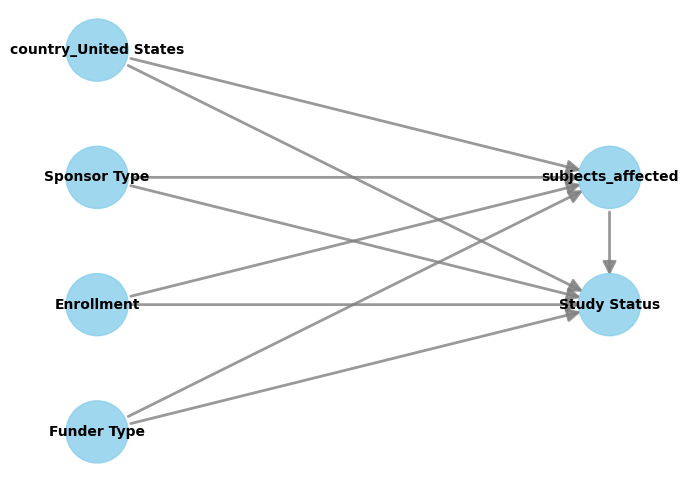

In [15]:
causal_model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    common_causes=confounders,
)

causal_model.view_model()
plt.show()

In [16]:
identified_estimand = causal_model.identify_effect()
print(identified_estimand)

causal_estimate = causal_model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching",
    target_units="ate",  
)
print("Causal Estimate:", causal_estimate)

refutation = causal_model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause",
)
print(refutation)

ERROR:dowhy.causal_estimator:No valid identified estimand available.
ERROR:dowhy.causal_model:Aborting refutation! No estimate is provided.


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate: Estimation failed! No relevant identified estimand available for this estimation method.


ValueError: Aborting refutation! No valid estimate is provided.

In [17]:
print("Treatment Variable Summary:")
print(df[treatment].describe())
print("Unique Values:", df[treatment].nunique())


Treatment Variable Summary:
count    2.575760e+05
mean     4.440892e-16
std      0.000000e+00
min      4.440892e-16
25%      4.440892e-16
50%      4.440892e-16
75%      4.440892e-16
max      4.440892e-16
Name: subjects_affected, dtype: float64
Unique Values: 1


In [18]:
print("Outcome Variable Summary:")
print(df[outcome].describe())
print("Unique Values:", df[outcome].nunique())


Outcome Variable Summary:
count    257576.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Study Status, dtype: float64
Unique Values: 1


In [23]:
print(df["subjects_affected"].unique())
print(df["Study Status"].unique())


[4.4408921e-16]
[0]


In [26]:
print("Enrollment Summary:")
print(df["Enrollment"].describe())



Enrollment Summary:
count    257576.000000
mean          3.990736
std           1.437107
min           0.000000
25%           3.218876
50%           4.110874
75%           5.056246
max           5.872118
Name: Enrollment, dtype: float64


In [27]:
identified_estimand = causal_model.identify_effect()
print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [28]:
print("Treatment Variable Summary:")
print(df[treatment].describe())
print("Outcome Variable Summary:")
print(df[outcome].describe())
print("Confounders Summary:")
for confounder in confounders:
    print(confounder, df[confounder].describe())


Treatment Variable Summary:
count    2.575760e+05
mean     4.440892e-16
std      0.000000e+00
min      4.440892e-16
25%      4.440892e-16
50%      4.440892e-16
75%      4.440892e-16
max      4.440892e-16
Name: subjects_affected, dtype: float64
Outcome Variable Summary:
count    257576.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Study Status, dtype: float64
Confounders Summary:
Enrollment count    257576.000000
mean          3.990736
std           1.437107
min           0.000000
25%           3.218876
50%           4.110874
75%           5.056246
max           5.872118
Name: Enrollment, dtype: float64
Funder Type count     257576
unique        10
top        OTHER
freq      166372
Name: Funder Type, dtype: object
country_United States count    257576.000000
mean          0.398263
std           0.491385
min          -1.000000
25%           0.000000
50%           0.000000
75%           1.000000
max   

In [29]:
print(df["country_United States"].value_counts())
df["country_United States"] = df["country_United States"].replace(-1, np.nan)


country_United States
 0.0    154527
 1.0    102816
-1.0       233
Name: count, dtype: int64


In [33]:
!pip install dowhy networkx matplotlib numpy pandas 

import dowhy
from dowhy import gcm
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


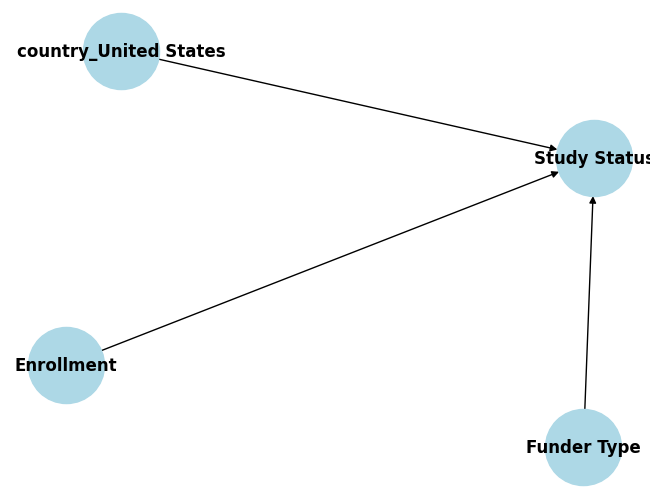

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ("Enrollment", "Study Status"),  #Hypothesis: 
    ("Funder Type", "Study Status"),  #Funding type influences
    ("country_United States", "Study Status")  #Country impacts trial completion
])

nx.draw(G, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)
plt.show()


In [36]:
print("Treatment Summary:", df[treatment].describe())
print("Outcome Summary:", df["Study Status"].value_counts())


Treatment Summary: count    2.575760e+05
mean     4.440892e-16
std      0.000000e+00
min      4.440892e-16
25%      4.440892e-16
50%      4.440892e-16
75%      4.440892e-16
max      4.440892e-16
Name: subjects_affected, dtype: float64
Outcome Summary: Study Status
0    257576
Name: count, dtype: int64
